# Concevoir une application au service de la santé publique (notebook 2/2)

In [1]:
#importons les librairies principales pour le calcul et le nettoyage
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Exploration

Dans le notebook précedant, nous avons traite le dataset.
nous avons encore des Nan celles qui remplacent les valeurs aberrantes.
Nous allons suivre les étapes suivantes:
1. Remplacer les valeurs manquantes a l'aide de l'iterrative imputer (exploration)
2. ACP pour la correlation entre les feature (exploration)
3. KNN pour notre modelisation (modelisation)
4. Kruskall-wallis pour verifier (Evaluation et interpretation)
5. Application


In [3]:
#on charge le dataset du notebook1
data=pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/data.csv")
data.head(2)

,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,6.0,d,NaN,beverages,teas and herbal teas and coffees,teas and herbal teas and coffees,...,79.0,0.5,0.1,4.5,4.4,0.5,0.01,0.004,NaN,6.0
1,"Lait entier (99%); poudre de lait (1%), fermen...",0.0,0.0,0.0,0.0,b,3.0,milk and dairy products,dairy desserts,dairy desserts,...,460.0,7.0,2.4,5.6,5.5,7.0,0.10,0.040,0.0,0.0


In [ ]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,184186.000000,184186.000000,184186.000000,231587.000000,176925.000000,244152.000000,257895.000000,257681.000000,246883.000000,257416.000000,253413.000000,257721.000000,252392.000000,252392.000000,183857.00000,231590.000000
mean,2.035258,0.019334,0.070049,9.036518,3.327472,274.412494,1141.044272,14.363677,5.587011,27.109299,13.273169,8.180860,1.283675,0.513673,9.06052,9.036634
std,2.936651,0.139536,0.308315,8.975043,1.012143,215.084048,891.740315,19.407208,9.521563,28.526680,19.616301,9.874875,17.650243,7.060052,39.50924,8.975066
min,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,-15.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,101.000000,418.000000,0.720000,0.100000,3.000000,0.600000,1.200000,0.067500,0.027000,0.00000,1.000000
50%,1.000000,0.000000,0.000000,10.000000,4.000000,256.000000,1059.000000,6.900000,2.000000,13.000000,3.600000,5.800000,0.577500,0.231000,0.00000,10.000000
75%,3.000000,0.000000,0.000000,16.000000,4.000000,397.000000,1654.000000,22.000000,8.100000,52.307694,17.700000,12.000000,1.332500,0.533000,1.00000,16.000000
max,33.000000,2.000000,5.000000,40.000000,4.000000,27800.000000,116000.000000,1300.000000,1600.000000,1900.000000,340.000010,2000.000000,2470.000000,987.000000,13461.00000,40.000000


In [4]:
#colonnes pour notre analyse / application
col=[ 'nutriscore_score',
 'additives_n',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g', 'nova_group']

In [5]:
#features
cols = [
 'nutriscore_score',
 'additives_n',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 ]

On commence par remplacer les nan à l'aide d'iterativeImputer

In [6]:
imp = IterativeImputer()
imp.fit(data[col])
data = pd.DataFrame(imp.transform(data[col]), columns = col)

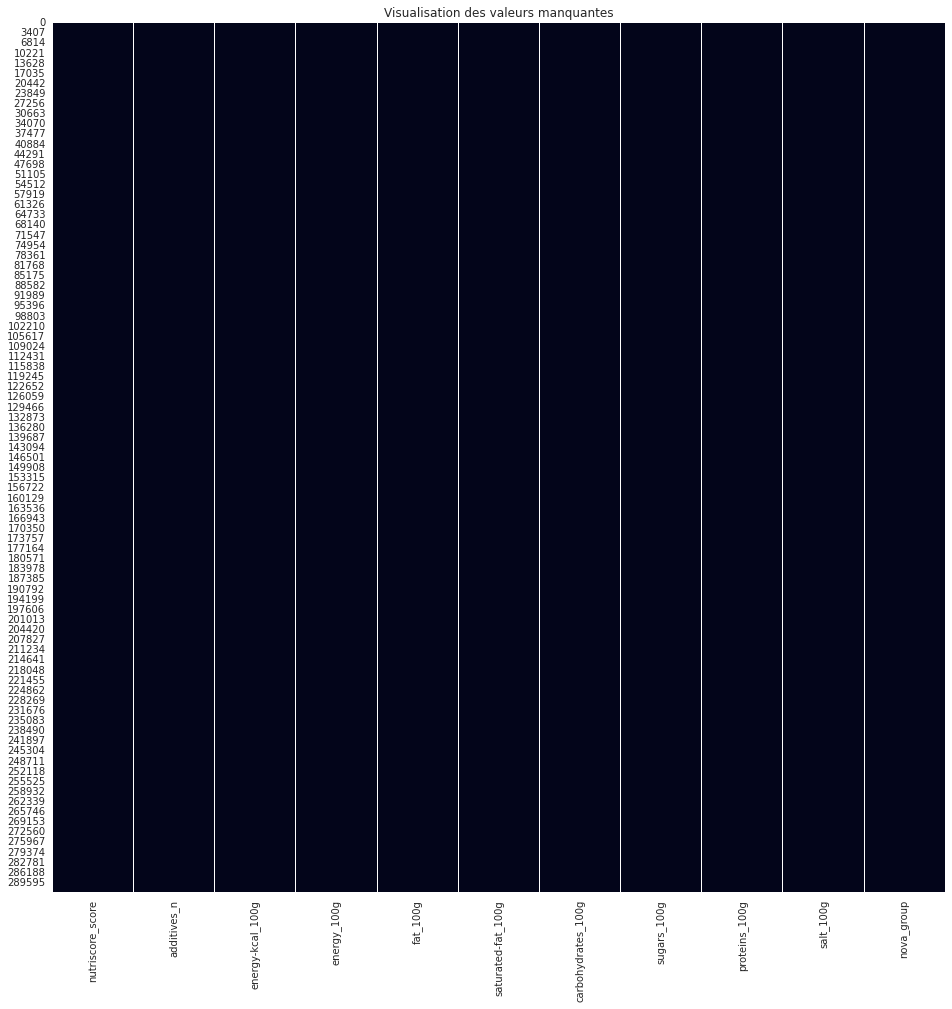

In [7]:
#rappelons composition et valeurs du dataset
sns.set_style('whitegrid')
plt.figure(figsize=(16,16)) #Réglage de la taille
plt.title("Visualisation des valeurs manquantes" ) #titre 
sns.heatmap(data.isnull(), cbar=False) #Affichage de la carte thermique


<Figure size 1080x864 with 0 Axes>

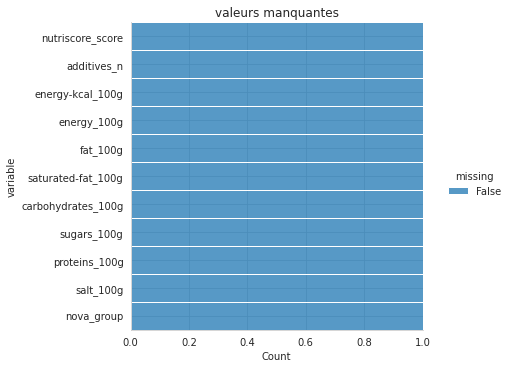

In [8]:
plt.figure(figsize=(15,12))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('valeurs manquantes')
plt.savefig('valeurs manquantes.png')
plt.show()

Regardons maintenant la correlation entre les features

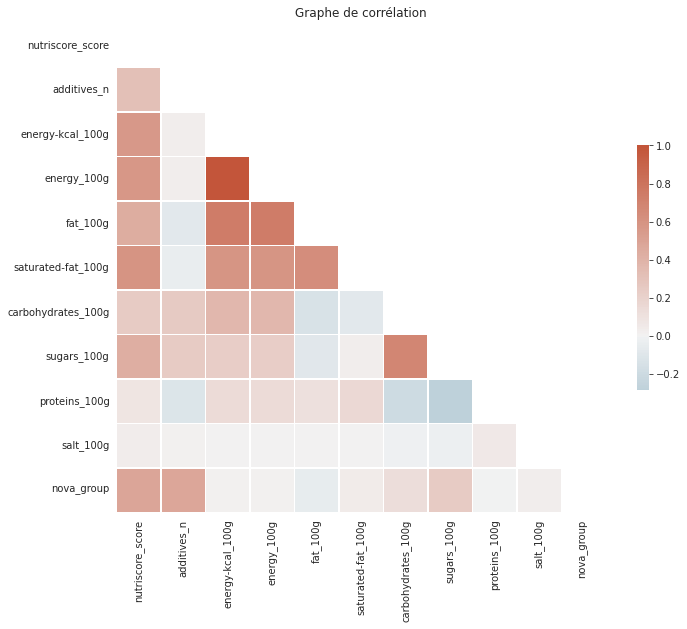

In [ ]:
# graphe de correlation
corr =data.corr()

# mask
mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title('Graphe de corrélation entre les features')
plt.show()

### Scaling

On continue la preparation de notre set pour notre analyse composantes prncipales(ACP)
l'idee est de savoir si nos valeurs sont dépendantes

In [ ]:
X = data[cols].dropna()
keep_ind = X.index


In [ ]:
#fit
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
#transform
X_scaled = scaler.transform(X)
X_scaled[:2]

array([[-0.32370522,  0.14600781, -1.2652667 , -1.26810674, -0.7595704 ,
        -0.59991119, -0.83112533, -0.46069123, -0.82911543, -0.07620673],
       [-1.01942049, -0.80309985, -0.81229875, -0.81313961, -0.40329883,
        -0.33910766, -0.79026506, -0.4011776 , -0.12811153, -0.07071441]])

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
idx = ["mean", "std"]

In [ ]:
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 2. Analyse Composantes Principales

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA


In [ ]:
n_components = len(cols)
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=10)

In [ ]:
#variance captée par chaque nouvelle composante arrondi à 2
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([37.75, 21.06, 10.41,  9.46,  8.58,  6.36,  3.06,  2.11,  1.12,
        0.08])

Nous en deduisant que pour la premiere composante nous avons quasiment 18%, deuxieme 21% ainsi ... etc

In [ ]:
#sommes cumulées
scree_cum = scree.cumsum().round()
scree_cum

array([ 38.,  59.,  69.,  79.,  87.,  94.,  97.,  99., 100., 100.])

les deux premières composantes captent 59%, avec la troisieme la somme cumulée est de 69% ...c'est au bout de la 4 ème composante que nous avons 80% des valeurs

In [ ]:
#liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

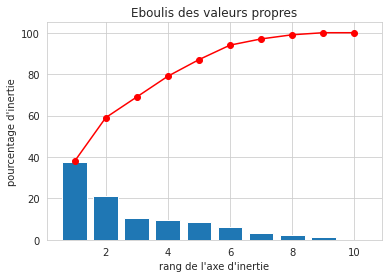

In [ ]:
#graphique de la variance selon les composantes
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

Le graphe nous confirme que notre n_component = 4 nous permet d'avoir 80% des valeurs




In [ ]:
pcs = pca.components_
pcs[:2]

array([[ 0.39575481,  0.06843617,  0.4840719 ,  0.48443181,  0.39708207,
         0.38022522,  0.17755525,  0.17762886,  0.06560629,  0.00820882],
       [-0.12178597, -0.34465552,  0.03395388,  0.03353212,  0.30601176,
         0.23499572, -0.54235821, -0.55181156,  0.34025503,  0.02855471]])

In [ ]:
#version Pandas
pcs = pd.DataFrame(pcs)
pcs.head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.395755,0.068436,0.484072,0.484432,0.397082,0.380225,0.177555,0.177629,0.065606,0.008209
1,-0.121786,-0.344656,0.033954,0.033532,0.306012,0.234996,-0.542358,-0.551812,0.340255,0.028555


In [ ]:
pcs.columns =cols
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,nutriscore_score,additives_n,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
F1,0.40,0.07,0.48,0.48,0.40,0.38,0.18,0.18,0.07,0.01
F2,-0.12,-0.34,0.03,0.03,0.31,0.23,-0.54,-0.55,0.34,0.03
F3,0.22,0.39,-0.09,-0.09,-0.11,0.02,-0.07,-0.04,0.33,0.81
F4,-0.33,-0.66,0.18,0.18,-0.02,-0.20,0.32,0.12,-0.01,0.48
F5,-0.03,0.02,0.08,0.08,-0.24,-0.19,0.28,0.02,0.84,-0.32
F6,0.43,-0.48,-0.27,-0.27,-0.23,0.41,-0.13,0.43,0.13,-0.02
F7,-0.28,0.08,0.01,0.01,-0.42,0.69,0.37,-0.35,-0.09,0.02
F8,-0.64,0.22,-0.07,-0.07,0.28,0.29,-0.17,0.56,0.18,0.03
F9,-0.08,0.04,0.38,0.37,-0.61,-0.05,-0.55,0.17,-0.08,0.00
F10,-0.00,0.00,-0.70,0.71,-0.00,0.00,-0.00,0.00,-0.00,0.00


In [ ]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
nutriscore_score,0.395755,-0.121786,0.217055,-0.326612,-0.033125,0.427265,-0.277584,-0.638475,-0.079958,-0.002913
additives_n,0.068436,-0.344656,0.389849,-0.661128,0.019173,-0.482398,0.079186,0.215596,0.040338,0.001238
energy-kcal_100g,0.484072,0.033954,-0.088638,0.182334,0.078663,-0.271235,0.014273,-0.065698,0.377565,-0.704689
energy_100g,0.484432,0.033532,-0.088898,0.182068,0.078449,-0.269515,0.012885,-0.068943,0.368863,0.709492
fat_100g,0.397082,0.306012,-0.105414,-0.017600,-0.240738,-0.227492,-0.423695,0.281452,-0.607298,-0.003299
saturated-fat_100g,0.380225,0.234996,0.018263,-0.200958,-0.194309,0.406593,0.685386,0.290227,-0.049277,0.000450
carbohydrates_100g,0.177555,-0.542358,-0.067367,0.321745,0.275019,-0.132746,0.372474,-0.169794,-0.552656,-0.003381
sugars_100g,0.177629,-0.551812,-0.043791,0.116873,0.021089,0.431405,-0.347548,0.557680,0.173266,0.001287
proteins_100g,0.065606,0.340255,0.325742,-0.006122,0.842424,0.131497,-0.085336,0.181256,-0.081678,-0.000059
salt_100g,0.008209,0.028555,0.813103,0.481590,-0.323610,-0.020871,0.015104,0.025693,0.002131,0.000311


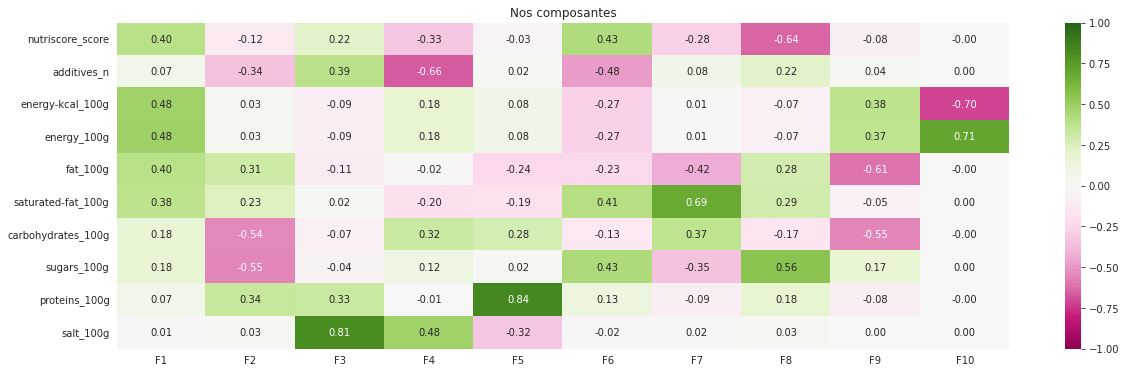

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="PiYG", fmt="0.2f")
plt.title("Nos composantes")
plt.show()
plt.savefig("component correlation")

In [ ]:
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5,6,7,8,9
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Projetons** maintenant ces resultats sur des plans factoriels

In [ ]:
def correlation_graph(pca, 
                      x_y, 
                      cols) : 


    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                cols[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

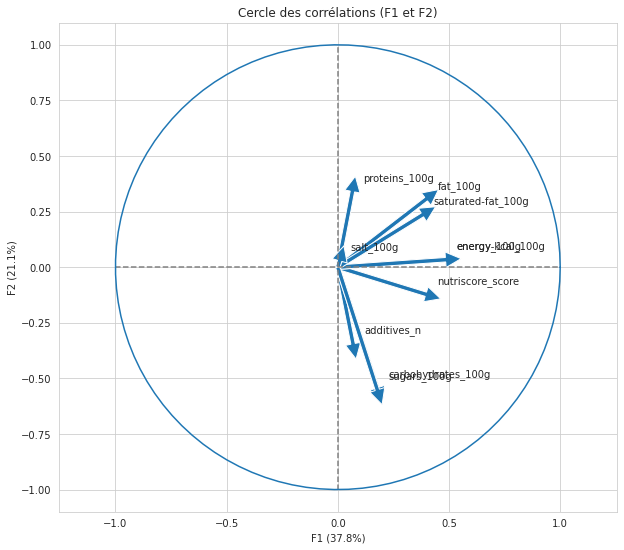

<Figure size 432x288 with 0 Axes>

In [ ]:
correlation_graph(pca, (0,1),cols)
plt.savefig('graphe correlation')

les variables energy sont biens representées selon ce plan.
les variables Fat et saturated Fat sont correlees entre elles et bien representees sur ce plan
la variable Salt toute fois n'est pas bien representée sur ce plan

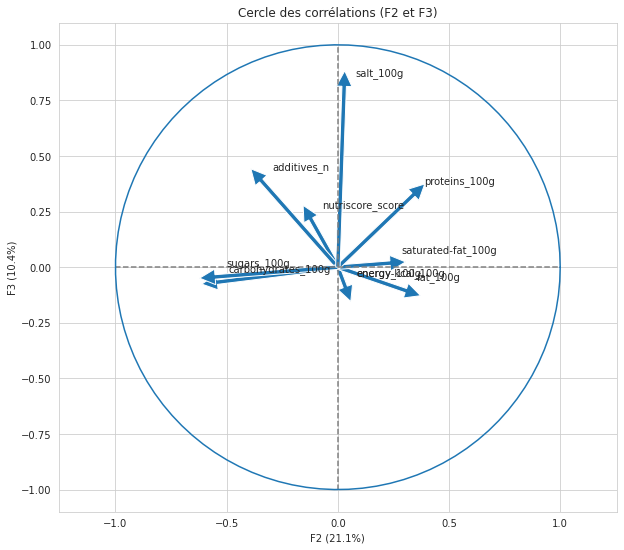

<Figure size 432x288 with 0 Axes>

In [ ]:
#On change de plan factoriel
correlation_graph(pca, (1,2),cols)
plt.savefig('graphe correlation')

Sur ce plan factoriel, la valeur salt est bien representée

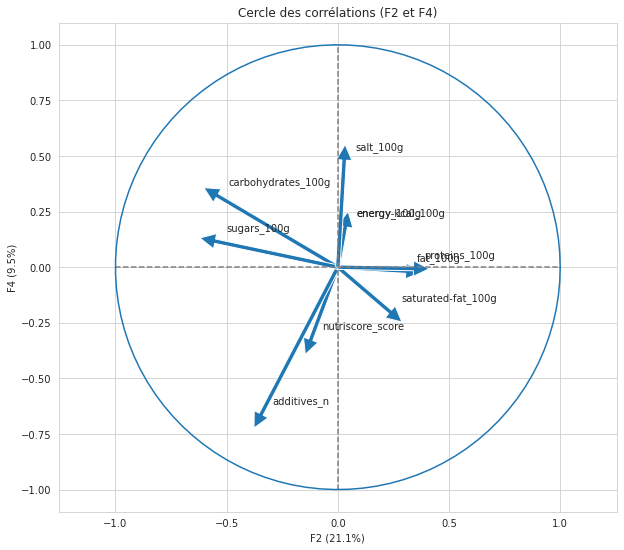

In [ ]:
#on change de plan factoriel
correlation_graph(pca, (1,3), cols)

In [ ]:
X_proj = pca.transform(X_scaled)
X_proj[:2]

array([[-2.15904361e+00, -4.91010579e-02,  2.47778965e-02,
        -6.71338567e-01, -7.98160721e-01,  2.09241285e-01,
        -1.02183384e-01, -2.47221561e-01,  2.42043255e-02,
        -2.48913689e-03],
       [-1.75516519e+00,  7.47365260e-01, -3.82174912e-01,
         3.08573615e-01, -2.57175876e-01,  2.61660403e-01,
        -9.29483405e-03,  2.60644962e-01,  8.16623913e-02,
         7.96905347e-04]])

In [ ]:
data.shape

(292976, 11)

In [ ]:
data.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/datafknn.csv', index=False)

# 3. Modélisation

le choix de **KNN** est basée sur le fait qu'il s'agit de données supervisées et qu'on cherche une classificatiion.

Notre **objectif metier** de cette analyse est de pouvoir renseigner Features Input et trouver le Nova group.

### K-NN

In [ ]:
#Librairies necessaires pour notre entrainement , modélisation et visualisation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 
from sklearn.datasets import make_moons 
import plotly.graph_objects as go 

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/datafknn.csv") 


In [ ]:
df.shape

(292976, 11)

In [ ]:
df.describe()

,nutriscore_score,additives_n,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nova_group
count,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000
mean,8.791704,1.952874,273.188560,1140.941909,14.357989,5.390557,26.874739,12.915030,8.187903,1.258762,3.316339
std,8.624232,2.431675,200.897561,837.424554,18.244541,8.818915,26.921063,18.483192,9.272432,16.386537,0.843395
min,-15.000000,-43.077782,0.000000,0.000000,-18.734238,-12.948940,-933.604308,-891.995855,-13.142286,-2.195264,-14.128796
25%,2.000000,0.000000,116.000000,485.000000,1.110000,0.200000,3.800000,0.810000,1.800000,0.100000,3.000000
50%,8.791704,1.537754,273.188560,1140.941909,9.900000,2.650000,18.750000,4.800000,6.900000,0.700000,3.429244
75%,15.000000,2.826703,380.000000,1590.000000,20.000000,6.580000,48.155000,14.170000,11.000000,1.300000,4.000000
max,867.929744,33.000000,27800.000000,116000.000000,1300.000000,1600.000000,1900.000000,340.000010,2000.000000,2470.000000,10.839468


In [ ]:
df.isnull().mean()

nutriscore_score      0.0
additives_n           0.0
energy-kcal_100g      0.0
energy_100g           0.0
fat_100g              0.0
saturated-fat_100g    0.0
carbohydrates_100g    0.0
sugars_100g           0.0
proteins_100g         0.0
salt_100g             0.0
nova_group            0.0
dtype: float64

In [ ]:
df["nova_group"]=df['nova_group'].astype('category').cat.codes

In [ ]:
df['nova_group']

In [ ]:
#on separe set entrainement(train 30% du dataset) et set testing (test 70% du dataset)
#features
X = df.drop(['nova_group'], axis = 1) 

#target
y = df['nova_group']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =.3)

In [ ]:
X_test

,nutriscore_score,additives_n,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,6.000000,2.307917,19.000000,79.000000,0.500000,0.100000,4.500000,4.400000,0.500000,0.010000
1,0.000000,0.000000,110.000000,460.000000,7.000000,2.400000,5.600000,5.500000,7.000000,0.100000
2,1.000000,1.548851,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-4.000000,0.000000,150.000000,628.000000,4.420000,0.880000,0.000000,0.000000,25.660000,0.155000
4,8.768404,1.950536,273.174504,1140.908275,14.360577,5.390956,26.902310,12.947541,8.145406,0.000000
...,...,...,...,...,...,...,...,...,...,...
292971,8.791704,1.952874,273.188560,1140.941909,14.357989,5.390557,26.874739,12.915030,8.187903,1.258762
292972,-4.000000,-0.110434,105.000000,439.000000,1.400000,0.400000,0.000000,0.000000,23.000000,0.190000
292973,4.000000,1.577288,221.000000,925.000000,9.800000,2.400000,22.000000,1.100000,10.100000,1.330000
292974,17.000000,3.000000,400.000000,1674.000000,3.330000,0.000000,80.000000,43.330000,6.670000,1.667500


In [ ]:
y_test

0         50353
1         21566
2         31282
3          5394
4         40947
          ...  
292971    41078
292972     6461
292973    27922
292974    71955
292975    71955
Name: nova_group, Length: 292976, dtype: int32

### choix du K 

In [ ]:
# On choisit différents k 
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn7 = KNeighborsClassifier(n_neighbors=7)

On essaie des valeurs distinctes et voyons ce que cela donne?


In [ ]:
#entrainement

knn5.fit(X_train, y_train)
knn10.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn7.fit(X_train, y_train)


y_pred_5 = knn5.predict(X_test)
y_pred_10 = knn10.predict(X_test)
y_pred_2 = knn2.predict(X_test)
y_pred_7 = knn7.predict(X_test)


In [ ]:
# Vérification de la précision selon les differents k
print("Accuracy with k=2", accuracy_score(y_test, y_pred_2)*100)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=7", accuracy_score(y_test, y_pred_7)*100)
print("Accuracy with k=10", accuracy_score(y_test, y_pred_10)*100)

Accuracy with k=2 49.124503657856714
Accuracy with k=5 56.234284869102204
Accuracy with k=7 57.34131273252705
Accuracy with k=10 57.73724870012401


Comme on peut le voir de l'accuracy, un k=10 est le nombre de voisins qui permet la meilleurs des prediction selon ce modèle

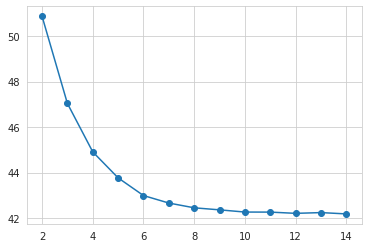

<Figure size 432x288 with 0 Axes>

In [ ]:
#graphe des k
errors=[]

for k in range(2,15): 
  knn = KNeighborsClassifier(k)
  errors.append(100*(1-knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()
plt.savefig("knn")

plus le k augumente plus on a une meilleure precision de la prédiction

In [ ]:
print(y_pred_10)

[    8 71955 21566 ... 71955 71955 17485]
[21566 71955 21566 ... 71955 71955 17485]
[21566 71955 71955 ... 71955 71955 71955]
[21566 71955 71955 ... 71955 71955 71955]


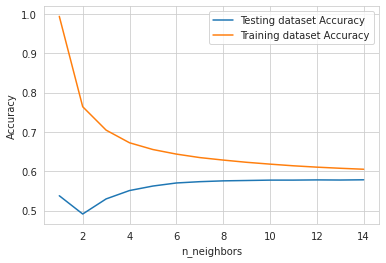

In [ ]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()

In [ ]:
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

# 4. Evaluation et intérpretation

###Kruskal Wallis




In [ ]:
import scipy
from scipy import stats
from scipy.stats.mstats import kruskal

In [ ]:
salt_100g = df['salt_100g'].to_numpy()

In [ ]:
sugar_100g = df['sugars_100g'].to_numpy()

In [ ]:
nutriscore_score = df['nutriscore_score'].to_numpy()

In [ ]:
energy_kcal_100g = df['energy-kcal_100g'].to_numpy()

In [ ]:
energy_100g = df['energy_100g'].to_numpy()

In [ ]:
saturated_fat_100g = df['saturated-fat_100g'].to_numpy()

In [ ]:
carbohydrates_100g = df['carbohydrates_100g'].to_numpy()

In [ ]:
proteins_100g = df['proteins_100g'].to_numpy()

In [ ]:
scipy.stats.kruskal(salt_100g,sugar_100g, nutriscore_score, energy_kcal_100g, energy_100g, saturated_fat_100g, carbohydrates_100g, proteins_100g)


KruskalResult(statistic=1424024.8159597833, pvalue=0.0)

Il ya une  difference significative entre nos groupes

# 5. Application


Quels sont les seuils acceptés ?

1.   energy-kcal_100g < 1000                                  
2.   fat_100g 
3.   saturated-fat_100g < 60
4.   carbohydrates_100g
5.   sugars_100g < 100
6.   proteins_100g < 60
7.   energy_100g 
8.   salt_100g  < 100
9.   sodium_100g  < 23


In [ ]:
df.nova_group

0         50353
1         21566
2         31282
3          5394
4         40947
          ...  
292971    41078
292972     6461
292973    27922
292974    71955
292975    71955
Name: nova_group, Length: 292976, dtype: int32

In [ ]:
c = df['nova_group'].astype('category')
codes = c.cat.codes
categories = c.cat.categories

In [ ]:
df['nova_group']

0         50353
1         21566
2         31282
3          5394
4         40947
          ...  
292971    41078
292972     6461
292973    27922
292974    71955
292975    71955
Name: nova_group, Length: 292976, dtype: int32

In [ ]:
X

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.9 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=af851b80fe2086cda21f3cf8f432f8b2fafdcb0ec3a507f38d8f7ae0e9df38f1
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb7

In [ ]:
import streamlit as st
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#titre application
st.write( ''' #Bienvenu
            Cette appli vous aide dans votre choix
            ''')


  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-01-13 07:58:06.253 
  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
cols

['nutriscore_score',
 'additives_n',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g']

In [ ]:
#Input client
st.sidebar.header("valeurs nutritionnelles")

DeltaGenerator(_root_container=1, _provided_cursor=None, _parent=DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None), _block_type=None, _form_data=None)

In [ ]:
# parametres entrée
def user_input():
   nutriscore_score= st.sidebar.slider("nutriscore")
   energy_100g = st.sidebar.slider("energy_100g")
   energy_kcal_100g = st.sidebar.slider("energy_kcal_100g")
   fat_100g = st.sidebar.slider("fat 100g")
   saturated_fat_100g = st.sidebar.slider("saturated fat")
   carbohydrates_100g = st.sidebar.slider("carbohydrates 100g")
   sugars_100g = st.sidebar.slider("sugars")
   proteins_100g = st.sidebar.slider("proteins")
   salt_100g = st.sidebar.slider("salt")
   nova_group = st.sidebar.slider("nova_group")
   datas = {'nutriscore_score':nutriscore_score,
           'energy_100g':energy_100g,
           'energy_kcal_100g':energy_kcal_100g,
           'fat_100g':fat_100g,
           'saturated_fat_100g':saturated_fat_100g,
           'carbohydrates_100g':carbohydrates_100g,
           'sugars_100g':sugars_100g,
            'proteins_100g':proteins_100g,
           'salt_100g':salt_100g
  }
   produit_parametres = pd.DataFrame(datas, index=[0])
   return produit_parametres

data2= user_input()
st.subheader('le nova group est : ')
st.write(data2)

2023-01-13 07:58:06.303 Session state does not function when running a script without `streamlit run`


In [ ]:
prediction = knn10.predict(data2)

In [ ]:
st.subheader("le produit est :")
st.write(y_pred_10[prediction])

In [ ]:
y_pred_10[prediction]

array([71955], dtype=int32)